**Capacitated Vehicle Routing Problem**

---
For this practice we intend to perform an example of the CVRP problem. The basic version of this problem tries to determine the routes of k vehicles of capacity Q that starting from a common origin must pass through a set of locations of interest (customers) to pick up or distribute goods according to a demand "di" of each customer, and return back to the origin so that the total distance traveled (the cost or time spent) by the set of vehicles is minimum.

In our case no time windows are taken into account, we focus on minimizing the total distance traveled by our vehicles. All our vehicles have the same capacity and we do not force all vehicles to be used if it is not necessary, although the latter only requires the change of a symbol in a restriction, so it is not really a limitation.

In [ ]:
# Python extension to write and subsequently solve the linear programming problem designed
!pip install ortools
from ortools.linear_solver import pywraplp

# Libraries for certain mathematical functions and 2D graphics representation
import random
import numpy as np
import matplotlib.pyplot as plt

Functions for the visualization of the different parts of our problem.

In [ ]:
# Show customers, nodes, demand for each customer, arcs between our nodes and their respective costs
def showInfo():
 print('Clients: ', set(client))
 print('\nNodes: ', set(nodes))
 print("\nDemands: " + str(d))
 print("\nArcs: " + str(arcs))
 print("\nCosts: " + str(c))


# Show generated nodes next to the starting point (warehouse)
def showNodes():
  plt.figure(figsize=(20,10))
  plt.rcParams.update({'font.size': 12})
  plt.scatter(loc_x,loc_y,color="green")

  for i in client:
    plt.annotate('$d_{%d}=%d$'%(i,d[i]),(loc_x[i]+1,loc_y[i]-0.5))
    
  plt.plot(loc_x[0],loc_y[0],color='red',marker='s')
  plt.annotate('WH',(loc_x[0]-2,loc_y[0]+2))

  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.title("Node Graph | CVRP | Q = %d" % Q )

  plt.show()


# Show solution of the problem - Configuration of the different routes
def showSolution(active_arcs):
  plt.figure(figsize=(20,10))
  plt.rcParams.update({'font.size': 12})
  plt.scatter(loc_x,loc_y,color="green")

  for i in client:
    plt.annotate('$d_{%d}=%d$'%(i,d[i]),(loc_x[i]+1,loc_y[i]-0.5))
    
  plt.plot(loc_x[0],loc_y[0],color='red',marker='s')
  plt.annotate('WH',(loc_x[0]-2,loc_y[0]+2))

  for i,j in active_arcs:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],color="blue",alpha=0.3)

  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.title("Node Graph | CVRP | Q = %d" % Q )

  plt.show()

We generate the data of our problem

Clients:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

Nodes:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

Demands: {1: 7, 2: 7, 3: 1, 4: 5, 5: 9, 6: 8, 7: 7, 8: 5, 9: 8, 10: 6, 11: 10, 12: 4}

Arcs: {(7, 3), (6, 9), (12, 1), (7, 12), (0, 7), (1, 6), (0, 10), (3, 7), (2, 5), (1, 11), (8, 5), (5, 8), (4, 0), (10, 8), (9, 0), (6, 7), (11, 5), (10, 7), (7, 6), (6, 10), (12, 6), (0, 4), (4, 10), (3, 2), (2, 6), (8, 2), (5, 11), (4, 5), (9, 3), (6, 0), (11, 0), (7, 5), (12, 11), (0, 1), (3, 12), (1, 12), (8, 12), (3, 1), (2, 11), (7, 8), (12, 8), (3, 11), (2, 1), (8, 9), (4, 12), (2, 12), (9, 4), (5, 1), (10, 3), (7, 2), (12, 2), (11, 10), (1, 5), (0, 11), (3, 6), (1, 10), (8, 6), (4, 1), (10, 9), (9, 7), (6, 4), (5, 4), (11, 4), (10, 4), (7, 1), (6, 11), (12, 7), (11, 9), (0, 5), (1, 0), (0, 8), (4, 11), (3, 5), (2, 7), (8, 3), (5, 10), (4, 6), (9, 2), (6, 1), (5, 7), (11, 3), (7, 4), (12, 4), (0, 2), (1, 3), (4, 8), (3, 0), (2, 8), (9, 8), (8, 0), (6, 2), (7, 11), (12, 9), (3, 10), (8, 10), (

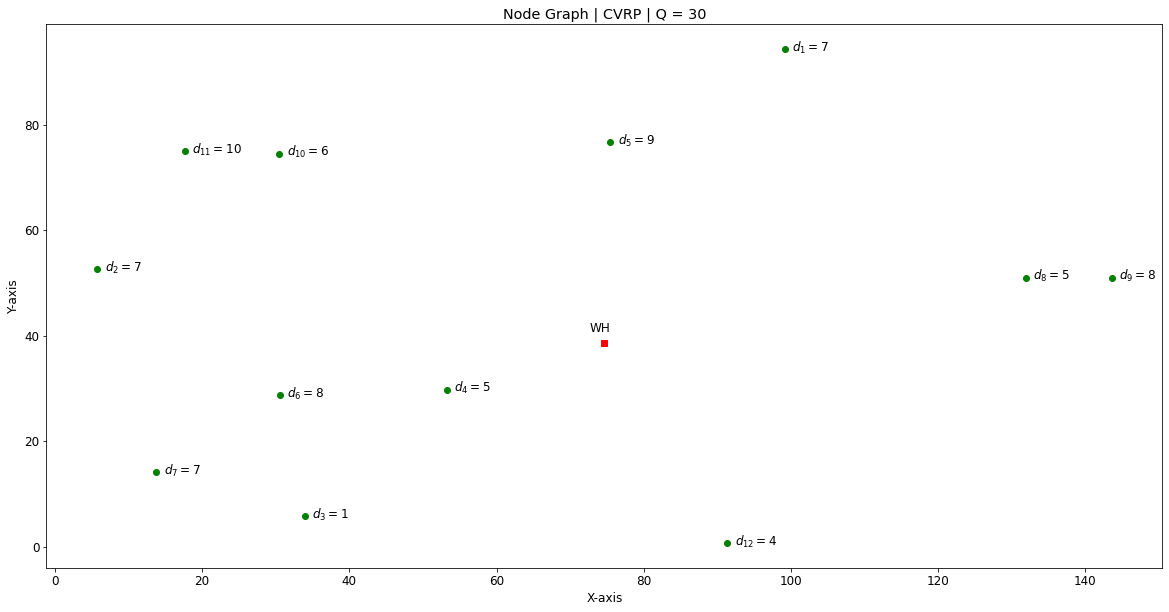

In [ ]:
random.seed(0)
# Number of customers
n = 12
# Customers
client = [i for i in range(1,n+1)]
# Nodes - We understand node zero as our point of origin (warehouse)
nodes = [0] + client
# We randomly generate n points in the plane
loc_x= np.random.rand(len(nodes))*200
loc_y= np.random.rand(len(nodes))*100

# Number of vehicles
k = 5
# Vehicles
K = range(k)
# Vehicle capacity
Q = 30 

# Demand from each customer or node
d = {(i) : random.randint(1,10) for i in client}

# Arcs between nodes
arcs = { (i,j) for i in nodes for j in nodes if i!=j }

# Cost associated with each arc between the nodes, in this case, the distance between the two nodes
c = {(i,j):np.hypot(loc_x[i]-loc_x[j],loc_y[i]-loc_y[j]) for i in nodes for j in nodes if i!=j}


# We show the layout of the problem once all generated
showInfo()
print('\n')
showNodes()

We pose our model and solve the problem

Total distance =  554.5057877850119 km
Execution time 20.5 seconds 



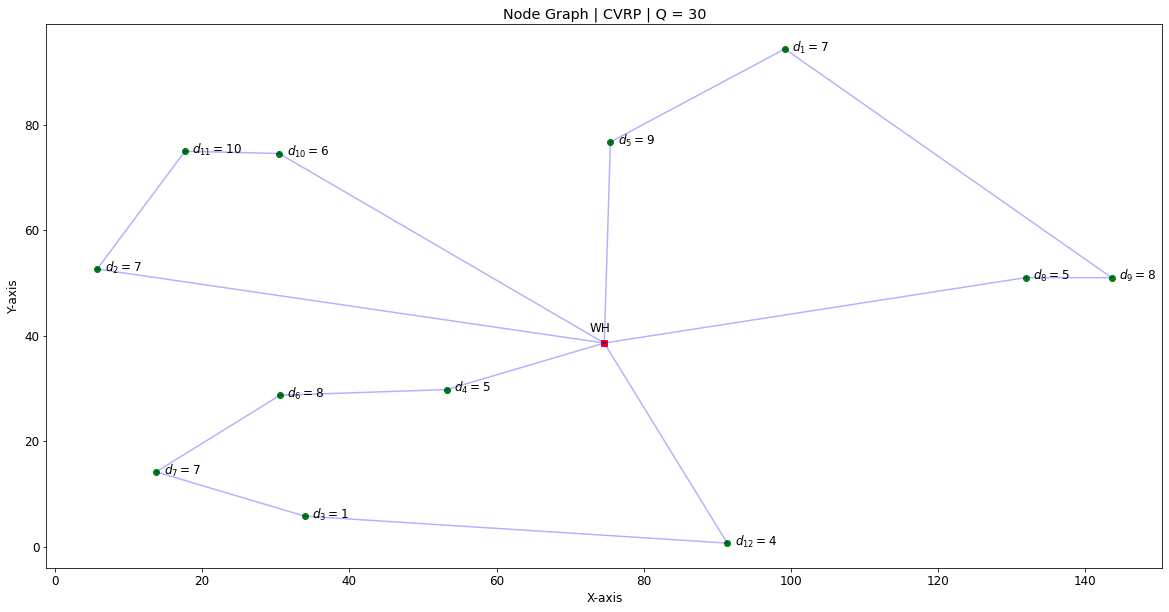

In [ ]:
solver = pywraplp.Solver('CVRP', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

# Decision variables

# Variable to check that the node belongs to the optimal path
x = {}
for i,j in c.keys():
    x[i,j] = solver.BoolVar(name='x[%i,%i]' % (i,j))

# Load variable
u = {}
for i in nodes:
    u[i] = solver.IntVar(0, Q, name='u[%i]' % i)

# Target function
solver.Minimize(solver.Sum(c[i,j] * x[i,j]  for i,j in c.keys()))


# Restrictions
[solver.Add( solver.Sum(x[i,j] for j in nodes if i!=j) == 1 ) for i in client ]
[solver.Add( solver.Sum(x[i,j] for i in nodes if i!=j) == 1 ) for j in client ]
[solver.Add(d[i] <= u[i] <= Q) for i in client ]

for i in client:
  for j in client:
    if i != j:
      solver.Add((u[i] - u[j] + Q * x[i,j]) <= Q - d[j])

solver.Add(solver.Sum(x[0,j] for j in nodes if j!= 0 ) <= k) 
#solver.Add(solver.Sum(x[i,0] for i in nodes if i!= 0 ) <= k)

solver.set_time_limit(90000)
solution = solver.Solve()

if solution == solver.OPTIMAL:
  
  # We show optimal minimum distance
  print('Total distance = ', solver.Objective().Value(),'km')
  print('Execution time', solver.WallTime()/1000, "seconds \n")

  # Select the arcs that are part of the optimal route
  active_arcs = [i for i in arcs if x[i].solution_value() > 0.9]

  # We can follow each route and check that none of them exceeds the maximum load of our transports and that all the demands are satisfied
  # Each node is represented by its demand and a subscript indicating the customer it represents
  showSolution(active_arcs)